<a href="https://colab.research.google.com/github/jacobthazmathew/HI-2022-Final-Project/blob/main/Final_Project_for_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HI 2022: Final Project
# Fall 2025
# Stroke Prediction

# Importing necessary packages following Module patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Mounting your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
# Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#raw_data = pd.read_csv('/content/drive/My Drive/HI 2022/HI 2022 Final Project/healthcare-dataset-stroke-data.csv')
raw_data = pd.read_csv('/content/drive/My Drive/HI2022/healthcare-dataset-stroke-data.csv')
print ("Dataset Length:", len(raw_data))
print ("Dataset Shape:", raw_data.shape)
raw_data.head(20)

Dataset Length: 5110
Dataset Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Step 2

# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print("\nDataset Info:")
print(raw_data.info())

# Check for missing values
print("\n=== MISSING VALUES ===")
print(raw_data.isnull().sum())

# Target variable distribution
print("\n=== CLASS DISTRIBUTION ===")
print("Stroke Distribution:")
print(raw_data['stroke'].value_counts())
print("\nStroke Percentage:")
print(raw_data['stroke'].value_counts(normalize=True) * 100)

# Descriptive statistics for numeric features
print("\n=== DESCRIPTIVE STATISTICS (Numeric Features) ===")
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

for feature in numeric_features:
    # Filter out NaN values for statistical calculations
    data_values = raw_data[feature].dropna().values

    if len(data_values) > 0:
        mean = np.mean(data_values)
        median = np.median(data_values)
        mode_result = stats.mode(data_values, keepdims=True)
        std = np.std(data_values)
        var = np.var(data_values)
        min_val = np.min(data_values)
        max_val = np.max(data_values)
        range_val = max_val - min_val

        print(f"\n{feature.upper()}:")
        print(f"  Mean: {mean:.2f}")
        print(f"  Median: {median:.2f}")
        print(f"  Mode: {mode_result.mode[0]:.2f}")
        print(f"  Std Dev: {std:.2f}")
        print(f"  Variance: {var:.2f}")
        print(f"  Min: {min_val:.2f}")
        print(f"  Max: {max_val:.2f}")
        print(f"  Range: {range_val:.2f}")

# Categorical features analysis
print("\n=== CATEGORICAL FEATURES ANALYSIS ===")
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for feature in categorical_features:
    print(f"\n{feature.upper()} Distribution:")
    print(raw_data[feature].value_counts())

=== DATASET OVERVIEW ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

=== MISSING VALUES ===
id                     0
gender                 0
age                    0
hypertension 

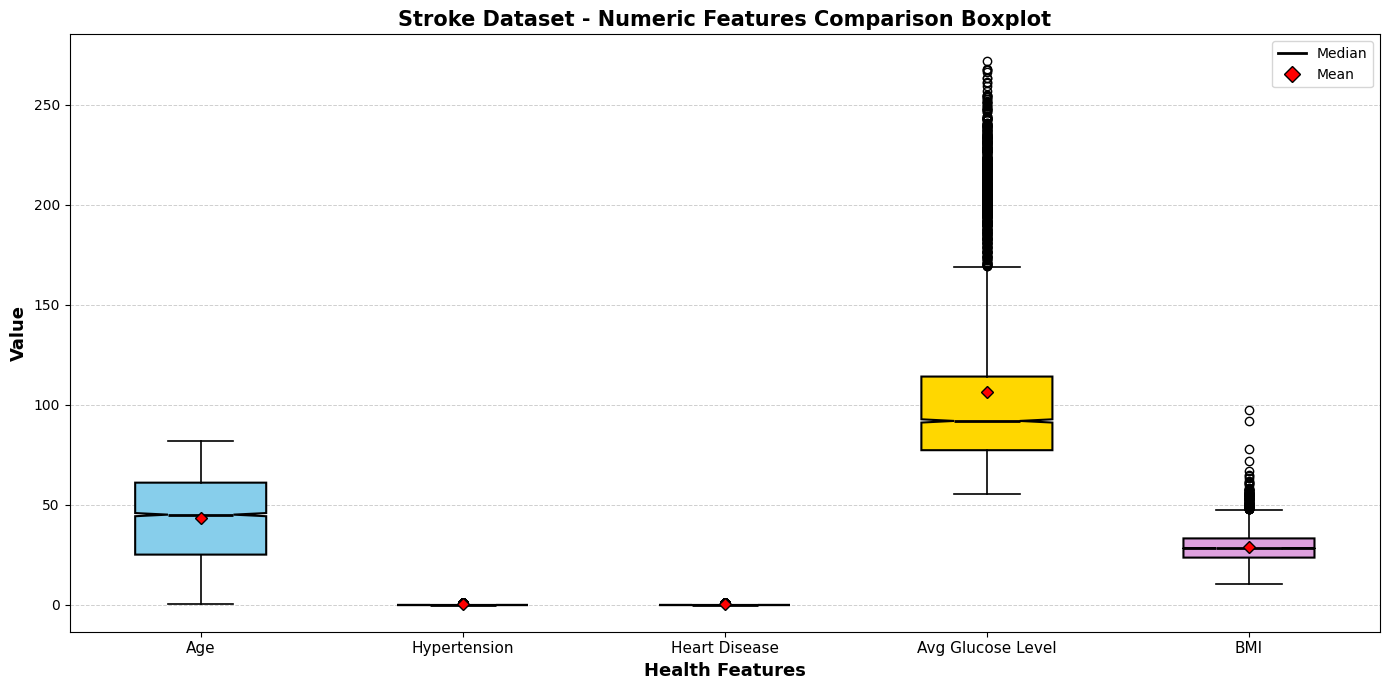

In [5]:
# Step 3: Data Visualization
# Visualization 1: Boxplot - Comparing Numeric Features

# Enhanced boxplot following Module 3 style
fig, ax = plt.subplots(figsize=(14, 7))

# Prepare data for boxplot (excluding 'id' column)
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
# Remove NaN values from BMI for boxplot
boxplot_data = [raw_data[feature].dropna().values for feature in numeric_features]
box_colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

bp = ax.boxplot(
    boxplot_data,
    patch_artist=True,
    notch=True,
    showmeans=True,
    meanline=False,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.2),
    capprops=dict(linewidth=1.2),
    medianprops=dict(color='black', linewidth=2),
    meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='red'),
)

# Color each box
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Set labels
feature_labels = ['Age', 'Hypertension', 'Heart Disease', 'Avg Glucose Level', 'BMI']
ax.set_xticks(range(1, len(numeric_features) + 1))
ax.set_xticklabels(feature_labels, fontsize=11)
ax.set_xlabel('Health Features', fontsize=13, fontweight='bold')
ax.set_ylabel('Value', fontsize=13, fontweight='bold')
ax.set_title('Stroke Dataset - Numeric Features Comparison Boxplot', fontsize=15, fontweight='bold')

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='black', linewidth=2, label='Median'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='red',
               markeredgecolor='black', markersize=8, label='Mean')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

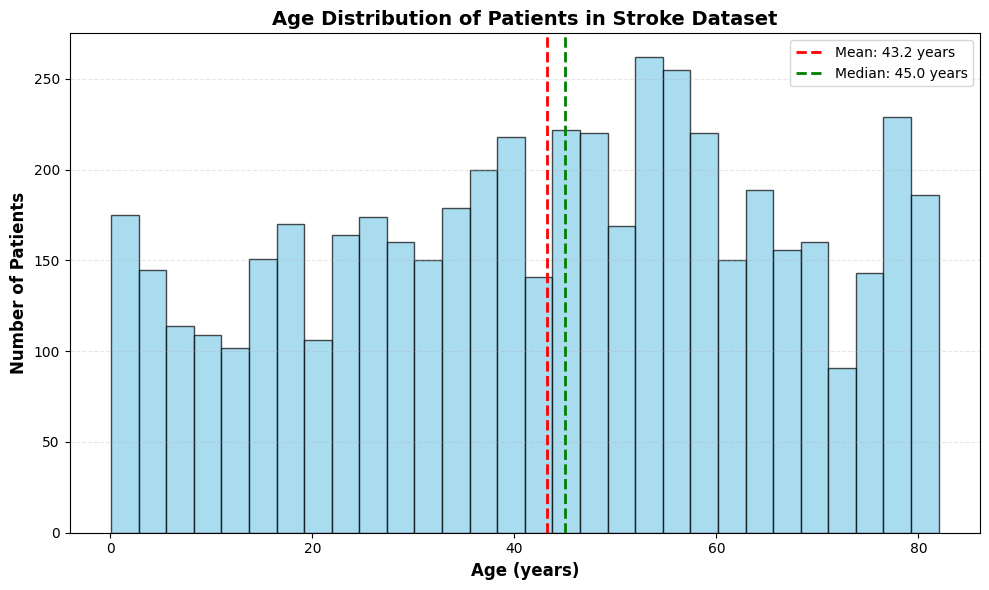

Age Statistics:
  Minimum Age: 0.08 years
  Maximum Age: 82.00 years
  Mean Age: 43.23 years
  Median Age: 45.00 years


In [6]:
# Visualization 1: Age Distribution Histogram
# Question: What is the age distribution of patients in our dataset?

fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(raw_data['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Age Distribution of Patients in Stroke Dataset', fontsize=14, fontweight='bold')

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

# Add mean and median lines for reference
mean_age = raw_data['age'].mean()
median_age = raw_data['age'].median()

ax.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f} years')
ax.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f} years')

ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Age Statistics:")
print(f"  Minimum Age: {raw_data['age'].min():.2f} years")
print(f"  Maximum Age: {raw_data['age'].max():.2f} years")
print(f"  Mean Age: {mean_age:.2f} years")
print(f"  Median Age: {median_age:.2f} years")

### **Visualization 1 Summary: Age Distribution Analysis**

#### **Key Observations:**

1. **Age Range Coverage**: The dataset includes patients from 0.08 years (infants) to 82 years old, providing comprehensive age representation across the entire lifespan.

2. **Infant Cases Present**: While the presence of very young patients (0.08 years) initially appears as an outlier, pediatric strokes are medically documented. According to medical literature, strokes can occur in infants and children, though they are rare.

3. **Middle-Age Concentration**: The data shows notable concentration in the **40-60 age range**, with the highest frequency around 50-55 years. This suggests that our dataset captures stroke risk in middle-aged populations, not just elderly patients as commonly assumed.

4. **Distribution Balance**:
   - Mean age: 43.2 years
   - Median age: 45.0 years
   - The close proximity of mean and median indicates a relatively **balanced distribution** without extreme skewness.

5. **Age Gap Observation**: There is a noticeable dip in patient frequency between ages 10-30 years, which aligns with medical understanding that stroke risk increases significantly with age, though younger patients are still represented.

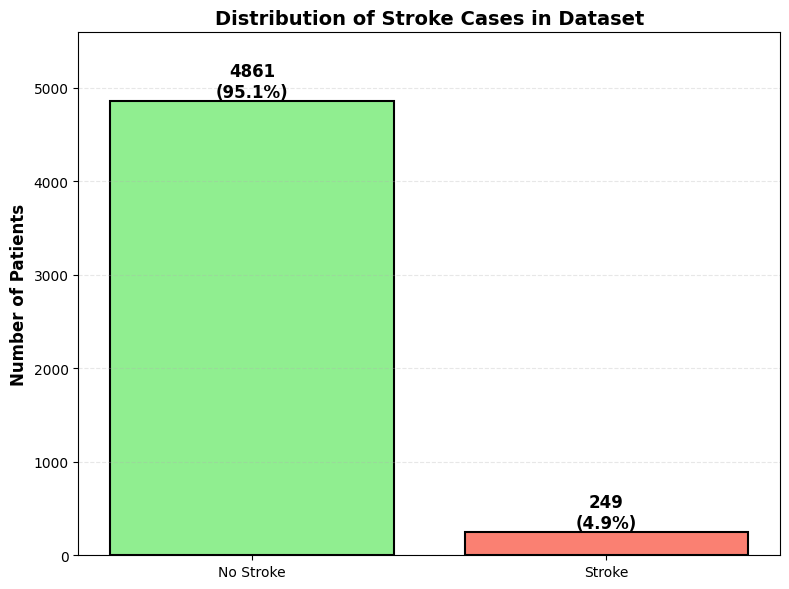

Stroke Distribution:
  No Stroke (0): 4861 patients (95.13%)
  Stroke (1): 249 patients (4.87%)
  Class Imbalance Ratio: 19.5:1


In [7]:
# Visualization 2: Stroke Distribution Bar Chart
# Question: What is the distribution of stroke cases vs non-stroke cases?

fig, ax = plt.subplots(figsize=(8, 6))

# Count stroke cases
stroke_counts = raw_data['stroke'].value_counts()
stroke_labels = ['No Stroke', 'Stroke']
colors = ['lightgreen', 'salmon']

# Create bar chart
bars = ax.bar(stroke_labels, stroke_counts.values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Stroke Cases in Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(stroke_counts.values) * 1.15)  # Add space for labels

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"Stroke Distribution:")
print(f"  No Stroke (0): {stroke_counts[0]} patients ({stroke_counts[0]/len(raw_data)*100:.2f}%)")
print(f"  Stroke (1): {stroke_counts[1]} patients ({stroke_counts[1]/len(raw_data)*100:.2f}%)")
print(f"  Class Imbalance Ratio: {stroke_counts[0]/stroke_counts[1]:.1f}:1")

### **Visualization 2 Summary: Stroke Distribution Analysis**

#### **Key Observations:**

1. **Severe Class Imbalance**: The dataset shows a significant imbalance between stroke and non-stroke cases:
   - **No Stroke**: 4,861 patients (95.1%)
   - **Stroke**: 249 patients (4.9%)
   - **Imbalance Ratio**: 19.5:1

2. **Real-World Reflection**: This imbalance actually reflects **real-world medical data** where stroke occurrence is relatively rare compared to the general population. This is typical in healthcare datasets for serious medical conditions.

3. **Visual Impact**: The bar chart clearly illustrates the massive difference in class sizes, with the "No Stroke" bar being approximately 20 times larger than the "Stroke" bar.

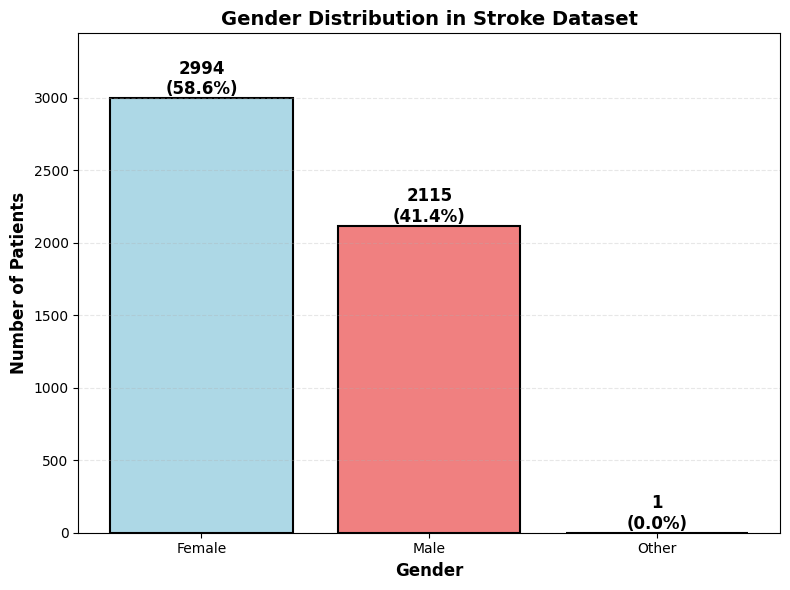

Gender Distribution:
  Female: 2994 patients (58.59%)
  Male: 2115 patients (41.39%)
  Other: 1 patients (0.02%)


In [8]:
# Visualization 3: Gender Distribution Bar Chart
# Question: What is the gender distribution of patients in our dataset?

fig, ax = plt.subplots(figsize=(8, 6))

# Count gender categories
gender_counts = raw_data['gender'].value_counts()
colors = ['lightblue', 'lightcoral', 'lightyellow']

# Create bar chart
bars = ax.bar(gender_counts.index, gender_counts.values, color=colors[:len(gender_counts)],
              edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
ax.set_xlabel('Gender', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Gender Distribution in Stroke Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(gender_counts.values) * 1.15)  # Add space for labels

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"Gender Distribution:")
for gender in gender_counts.index:
    count = gender_counts[gender]
    percentage = count/len(raw_data)*100
    print(f"  {gender}: {count} patients ({percentage:.2f}%)")

### **Visualization 3 Summary: Gender Distribution Analysis**

#### **Key Observations:**

1. **Gender Composition**:
   - **Female**: 2,994 patients (58.6%)
   - **Male**: 2,115 patients (41.4%)
   - **Other**: 1 patient (0.02%)

2. **Moderate Imbalance**: The dataset has more female patients than male patients, with a **Female-to-Male ratio of approximately 1.4:1**. This is a relatively moderate imbalance compared to the stroke class imbalance.

3. **"Other" Category**: There is 1 patient in the "Other" gender category. With only one observation, this category may need special handling during data preprocessing (potentially combine with a larger category or remove).


**Literature Evidence**: Sex and gender are well-established as significant factors in stroke epidemiology, risk factors, and outcomes

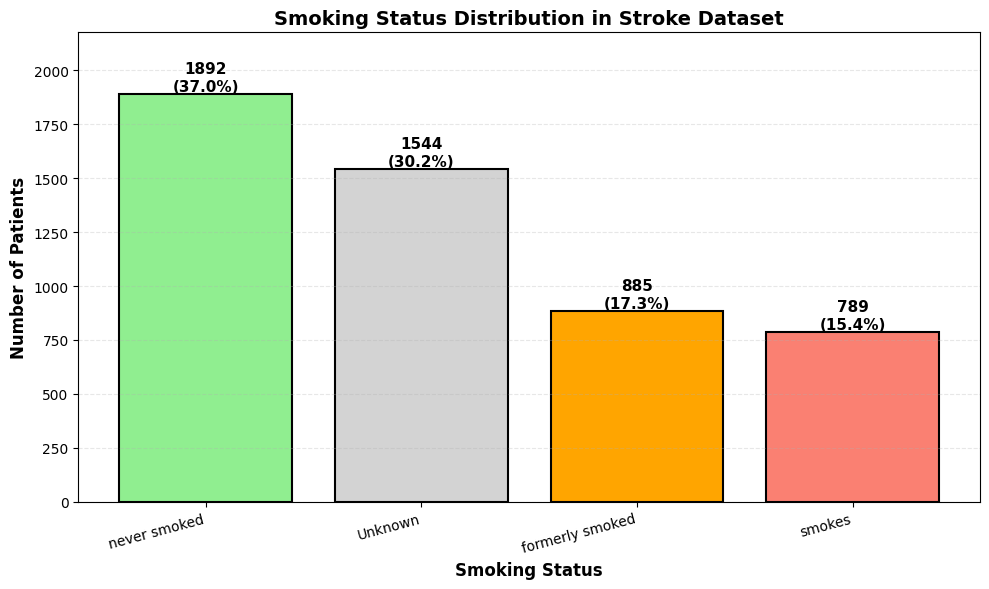

Smoking Status Distribution:
  never smoked: 1892 patients (37.03%)
  Unknown: 1544 patients (30.22%)
  formerly smoked: 885 patients (17.32%)
  smokes: 789 patients (15.44%)


In [9]:
# Visualization 4: Smoking Status Distribution Bar Chart
# Question: What is the smoking status distribution of patients in our dataset?

fig, ax = plt.subplots(figsize=(10, 6))

# Count smoking status categories
smoking_counts = raw_data['smoking_status'].value_counts()
colors = ['lightgreen', 'lightgray', 'orange', 'salmon']

# Create bar chart
bars = ax.bar(smoking_counts.index, smoking_counts.values,
              color=colors[:len(smoking_counts)],
              edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add labels and title
ax.set_xlabel('Smoking Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Smoking Status Distribution in Stroke Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(smoking_counts.values) * 1.15)  # Add space for labels

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, ha='right')

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"Smoking Status Distribution:")
for status in smoking_counts.index:
    count = smoking_counts[status]
    percentage = count/len(raw_data)*100
    print(f"  {status}: {count} patients ({percentage:.2f}%)")

### **Visualization 4 Summary: Smoking Status Distribution Analysis**

#### **Key Observations:**

1. **Distribution Breakdown**:
   - **Never smoked**: 1,892 patients (37.0%) - largest group
   - **Unknown**: 1,544 patients (30.2%) - **significant data quality concern**
   - **Formerly smoked**: 885 patients (17.3%)
   - **Smokes**: 789 patients (15.4%)

2. **Large "Unknown" Category Problem**: Nearly **one-third (30.2%)** of patients have unknown smoking status. This is a substantial portion of missing information for a feature that is medically known to be an important stroke risk factor.

3. **Known Smokers Combined**: When we combine current and former smokers:
   - Total with smoking history: 1,674 patients (32.7%)
   - This represents about one-third of the dataset with documented smoking exposure

4. **Distribution Among Known Cases**: Excluding "Unknown" status:
   - Never smoked: 53.1%
   - Formerly smoked: 24.8%
   - Currently smokes: 22.1%

#### **Medical Context vs Data Reality:**

**Literature Evidence**: Smoking is a well-established, independent risk factor for stroke and cardiovascular disease:


**Our Challenge**: With 30% unknown status:
- We cannot determine if "Unknown" patients are similar to "never smoked" or have smoking history
- This missing information could weaken the predictive power of this feature
- The "Unknown" category may contain a mix of all smoking behaviors

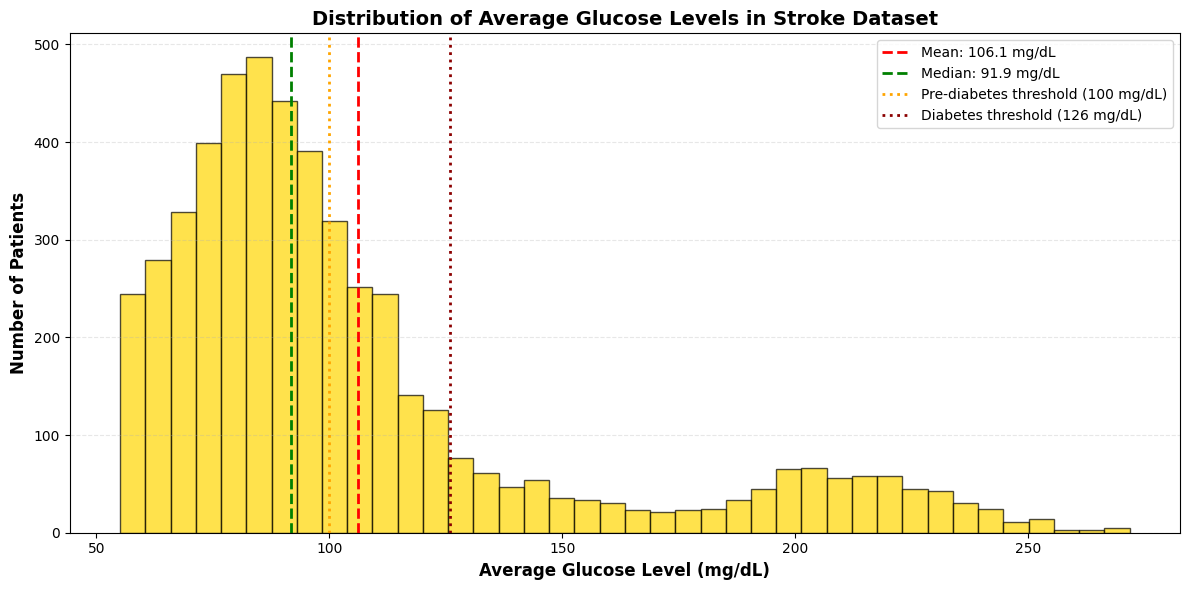

Average Glucose Level Statistics:
  Minimum: 55.12 mg/dL
  Maximum: 271.74 mg/dL
  Mean: 106.15 mg/dL
  Median: 91.88 mg/dL
  Std Dev: 45.28 mg/dL

Clinical Glucose Categories:
  Normal (<100 mg/dL): 3131 patients (61.3%)
  Pre-diabetic (100-125 mg/dL): 998 patients (19.5%)
  Diabetic (≥126 mg/dL): 981 patients (19.2%)


In [10]:
# Visualization 5: Average Glucose Level Distribution Histogram
# Question: What is the distribution of average glucose levels in our dataset?

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(raw_data['avg_glucose_level'], bins=40, color='gold', edgecolor='black', alpha=0.7)

# labels and title
ax.set_xlabel('Average Glucose Level (mg/dL)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Average Glucose Levels in Stroke Dataset', fontsize=14, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3, axis='y')

# mean and median lines for reference
mean_glucose = raw_data['avg_glucose_level'].mean()
median_glucose = raw_data['avg_glucose_level'].median()

ax.axvline(mean_glucose, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_glucose:.1f} mg/dL')
ax.axvline(median_glucose, color='green', linestyle='--', linewidth=2, label=f'Median: {median_glucose:.1f} mg/dL')

# clinical threshold lines
ax.axvline(100, color='orange', linestyle=':', linewidth=2, label='Pre-diabetes threshold (100 mg/dL)')
ax.axvline(126, color='darkred', linestyle=':', linewidth=2, label='Diabetes threshold (126 mg/dL)')

ax.legend(fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

# Print summary statistics with clinical interpretation
print(f"Average Glucose Level Statistics:")
print(f"  Minimum: {raw_data['avg_glucose_level'].min():.2f} mg/dL")
print(f"  Maximum: {raw_data['avg_glucose_level'].max():.2f} mg/dL")
print(f"  Mean: {mean_glucose:.2f} mg/dL")
print(f"  Median: {median_glucose:.2f} mg/dL")
print(f"  Std Dev: {raw_data['avg_glucose_level'].std():.2f} mg/dL")

# Clinical categories
normal = (raw_data['avg_glucose_level'] < 100).sum()
prediabetic = ((raw_data['avg_glucose_level'] >= 100) & (raw_data['avg_glucose_level'] < 126)).sum()
diabetic = (raw_data['avg_glucose_level'] >= 126).sum()

print(f"\nClinical Glucose Categories:")
print(f"  Normal (<100 mg/dL): {normal} patients ({normal/len(raw_data)*100:.1f}%)")
print(f"  Pre-diabetic (100-125 mg/dL): {prediabetic} patients ({prediabetic/len(raw_data)*100:.1f}%)")
print(f"  Diabetic (≥126 mg/dL): {diabetic} patients ({diabetic/len(raw_data)*100:.1f}%)")

### **Visualization 5 Summary: Average Glucose Level Distribution Analysis**

#### **Key Observations:**

1. **Distribution Statistics**:
   - **Mean**: 106.1 mg/dL
   - **Median**: 91.9 mg/dL
   - **Range**: 55.12 - 271.74 mg/dL
   - **Standard Deviation**: 45.28 mg/dL (high variability)

2. **Distribution Pattern**:
   - **Right-skewed distribution** with a peak around 80-100 mg/dL
   - Mean (106.1) is higher than median (91.9), indicating positive skew
   - Long tail extending to very high glucose values (>250 mg/dL)

3. **Clinical Categories (Based on Thresholds)**:
   - **Normal (<100 mg/dL)**: 3,131 patients (61.3%)
   - **Pre-diabetic range (100-125 mg/dL)**: 998 patients (19.5%)
   - **Diabetic range (≥126 mg/dL)**: 981 patients (19.2%)

4. **Notable Features**:
   - Substantial proportion (38.7%) have elevated glucose levels (≥100 mg/dL)
   - Clear separation between the normal distribution peak and the elevated glucose tail

#### **Critical Clinical Context - Limitations of This Data:**

**Important Distinction: Average Glucose ≠ Diabetes Diagnosis**

This dataset provides **"average glucose level"** measurements, but diabetes diagnosis requires specific clinical criteria that are NOT met by this single measurement.

**Our Data Limitations:**
- We do NOT know if these are fasting or random glucose measurements
- We do NOT have HbA1c values (which would be superior for assessing chronic glycemic control)
- We do NOT have repeated measurements or clinical diabetes diagnoses
- We cannot definitively classify patients as "diabetic" based solely on this single glucose value

Therefore, our categories (normal/pre-diabetic/diabetic) are **approximations based on thresholds**, not confirmed diagnoses.

**NB: Glucose Levels Themselves Predict Stroke (Even Without Diabetes Diagnosis):**

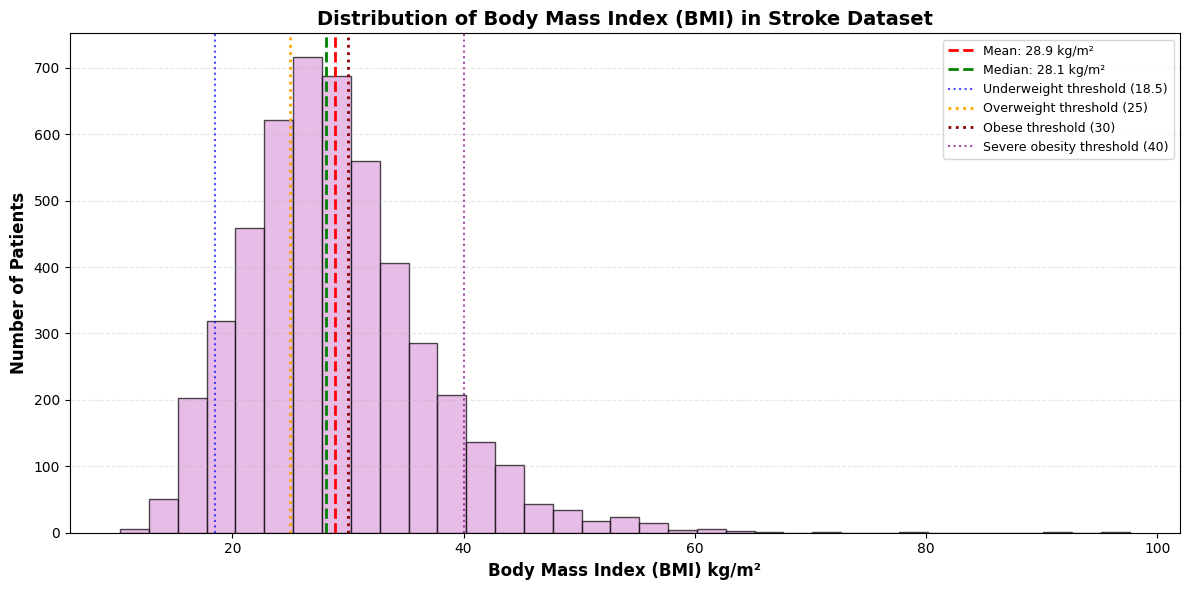

BMI Statistics (excluding 201 missing values):
  Minimum: 10.30 kg/m²
  Maximum: 97.60 kg/m²
  Mean: 28.89 kg/m²
  Median: 28.10 kg/m²
  Std Dev: 7.85 kg/m²

WHO BMI Categories (n=4909):
  Underweight (<18.5): 337 patients (6.9%)
  Normal (18.5-24.9): 1243 patients (25.3%)
  Overweight (25-29.9): 1409 patients (28.7%)
  Obese Class I (30-34.9): 1000 patients (20.4%)
  Obese Class II (35-39.9): 506 patients (10.3%)
  Obese Class III (≥40): 414 patients (8.4%)

Combined Categories:
  Normal or Underweight (<25): 1580 patients (32.2%)
  Overweight or Obese (≥25): 3329 patients (67.8%)


In [11]:
# Visualization 6: BMI Distribution Histogram
# Question: What is the distribution of Body Mass Index (BMI) in our dataset?

fig, ax = plt.subplots(figsize=(12, 6))

# Remove NaN values for visualization
bmi_data = raw_data['bmi'].dropna()

# Create histogram
ax.hist(bmi_data, bins=35, color='plum', edgecolor='black', alpha=0.7)

# Add labels and title
ax.set_xlabel('Body Mass Index (BMI) kg/m²', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Body Mass Index (BMI) in Stroke Dataset', fontsize=14, fontweight='bold')

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

# Add mean and median lines for reference
mean_bmi = bmi_data.mean()
median_bmi = bmi_data.median()

ax.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bmi:.1f} kg/m²')
ax.axvline(median_bmi, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bmi:.1f} kg/m²')

# Add clinical threshold lines (WHO categories)
ax.axvline(18.5, color='blue', linestyle=':', linewidth=1.5, alpha=0.7, label='Underweight threshold (18.5)')
ax.axvline(25, color='orange', linestyle=':', linewidth=2, label='Overweight threshold (25)')
ax.axvline(30, color='darkred', linestyle=':', linewidth=2, label='Obese threshold (30)')
ax.axvline(40, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, label='Severe obesity threshold (40)')

ax.legend(fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"BMI Statistics (excluding {raw_data['bmi'].isna().sum()} missing values):")
print(f"  Minimum: {bmi_data.min():.2f} kg/m²")
print(f"  Maximum: {bmi_data.max():.2f} kg/m²")
print(f"  Mean: {mean_bmi:.2f} kg/m²")
print(f"  Median: {median_bmi:.2f} kg/m²")
print(f"  Std Dev: {bmi_data.std():.2f} kg/m²")

# WHO BMI categories
underweight = (bmi_data < 18.5).sum()
normal = ((bmi_data >= 18.5) & (bmi_data < 25)).sum()
overweight = ((bmi_data >= 25) & (bmi_data < 30)).sum()
obese_1 = ((bmi_data >= 30) & (bmi_data < 35)).sum()
obese_2 = ((bmi_data >= 35) & (bmi_data < 40)).sum()
obese_3 = (bmi_data >= 40).sum()

total_with_bmi = len(bmi_data)

print(f"\nWHO BMI Categories (n={total_with_bmi}):")
print(f"  Underweight (<18.5): {underweight} patients ({underweight/total_with_bmi*100:.1f}%)")
print(f"  Normal (18.5-24.9): {normal} patients ({normal/total_with_bmi*100:.1f}%)")
print(f"  Overweight (25-29.9): {overweight} patients ({overweight/total_with_bmi*100:.1f}%)")
print(f"  Obese Class I (30-34.9): {obese_1} patients ({obese_1/total_with_bmi*100:.1f}%)")
print(f"  Obese Class II (35-39.9): {obese_2} patients ({obese_2/total_with_bmi*100:.1f}%)")
print(f"  Obese Class III (≥40): {obese_3} patients ({obese_3/total_with_bmi*100:.1f}%)")

# Combined categories
print(f"\nCombined Categories:")
print(f"  Normal or Underweight (<25): {underweight + normal} patients ({(underweight + normal)/total_with_bmi*100:.1f}%)")
print(f"  Overweight or Obese (≥25): {overweight + obese_1 + obese_2 + obese_3} patients ({(overweight + obese_1 + obese_2 + obese_3)/total_with_bmi*100:.1f}%)")

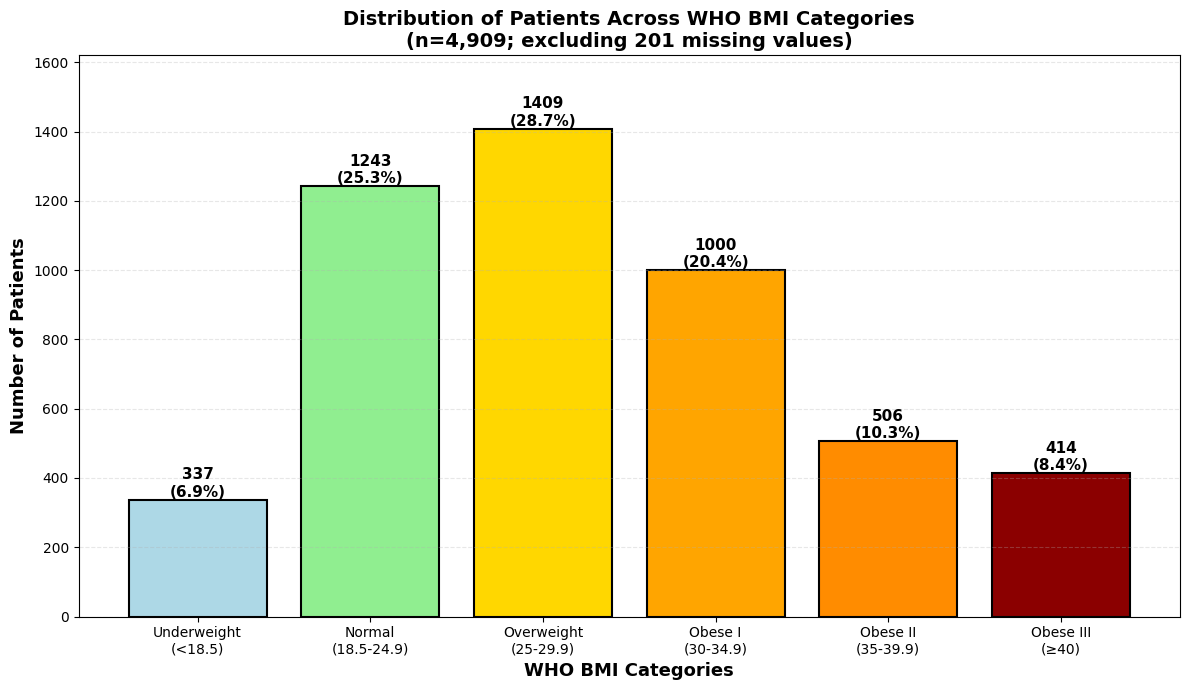


Key Findings:
  Total patients with BMI data: 4909
  Missing BMI values: 201 (3.9%)

  Healthy Weight (Normal or Underweight): 1580 (32.2%)
  Overweight or Obese: 3329 (67.8%)
  Obese (all classes): 1920 (39.1%)


In [12]:
# Visualization 6b: BMI Categories Bar Chart
# Question: How are patients distributed across WHO BMI categories?

fig, ax = plt.subplots(figsize=(12, 7))

# Remove NaN values
bmi_data = raw_data['bmi'].dropna()

# Calculate WHO BMI categories
categories = ['Underweight\n(<18.5)', 'Normal\n(18.5-24.9)', 'Overweight\n(25-29.9)',
              'Obese I\n(30-34.9)', 'Obese II\n(35-39.9)', 'Obese III\n(≥40)']

counts = [
    (bmi_data < 18.5).sum(),
    ((bmi_data >= 18.5) & (bmi_data < 25)).sum(),
    ((bmi_data >= 25) & (bmi_data < 30)).sum(),
    ((bmi_data >= 30) & (bmi_data < 35)).sum(),
    ((bmi_data >= 35) & (bmi_data < 40)).sum(),
    (bmi_data >= 40).sum()
]

colors = ['lightblue', 'lightgreen', 'gold', 'orange', 'darkorange', 'darkred']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)

# value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(bmi_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

#  labels and title
ax.set_xlabel('WHO BMI Categories', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Patients Across WHO BMI Categories\n(n=4,909; excluding 201 missing values)',
             fontsize=14, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3, axis='y')

ax.set_ylim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

print(f"\nKey Findings:")
print(f"  Total patients with BMI data: {len(bmi_data)}")
print(f"  Missing BMI values: {raw_data['bmi'].isna().sum()} ({raw_data['bmi'].isna().sum()/len(raw_data)*100:.1f}%)")
print(f"\n  Healthy Weight (Normal or Underweight): {counts[0] + counts[1]} ({(counts[0] + counts[1])/len(bmi_data)*100:.1f}%)")
print(f"  Overweight or Obese: {sum(counts[2:])} ({sum(counts[2:])/len(bmi_data)*100:.1f}%)")
print(f"  Obese (all classes): {sum(counts[3:])} ({sum(counts[3:])/len(bmi_data)*100:.1f}%)")

### **Visualization 6: BMI Distribution Analysis**

#### **Key Observations:**

1. **Missing Data**:
   - **201 patients (3.9%)** have missing BMI values
   - Analysis based on 4,909 patients with BMI data

2. **BMI Statistics**:
   - **Mean**: 28.9 kg/m² (overweight category)
   - **Median**: 28.1 kg/m² (overweight category)
   - **Range**: 10.3 - 97.6 kg/m² (extreme values present)
   - **Standard Deviation**: 7.85 kg/m²

3. **WHO BMI Category Distribution**:
   - **Underweight (<18.5)**: 337 patients (6.9%)
   - **Normal (18.5-24.9)**: 1,243 patients (25.3%)
   - **Overweight (25-29.9)**: 1,409 patients (28.7%) - **largest group**
   - **Obese Class I (30-34.9)**: 1,000 patients (20.4%)
   - **Obese Class II (35-39.9)**: 506 patients (10.3%)
   - **Obese Class III (≥40)**: 414 patients (8.4%)

4. **Aggregated Categories**:
   - **Healthy Weight** (Normal + Underweight): 1,580 patients (32.2%)
   - **Overweight or Obese** (≥25): 3,329 patients (67.8%)
   - **Obese** (all classes, ≥30): 1,920 patients (39.1%)

5. **Key Pattern**:
   - Nearly **two-thirds (67.8%)** of patients are overweight or obese
   - Almost **40%** are obese (BMI ≥30)
   - Only about **one-third** have healthy weight
   - The distribution shows a clear rightward shift from healthy weight categories

#### **Medical Context - BMI and Stroke Risk:**

**Literature Evidence**: Higher BMI is consistently associated with increased stroke risk, particularly for ischemic stroke.

**Major Findings from Key Studies:**

1. **Kurth et al. (2005)** - Women's Health Study:
   - Higher BMI is a strong risk factor for total and ischemic stroke in women
   - BMI >29 kg/m² showed significantly elevated risk vs normal weight

2. **Kurth et al. (2002)** - Men's Study (JAMA):
   - High BMI increased risk of total stroke and especially ischemic stroke in men
   - Supports sex-specific risk modeling for BMI effects

3. **Horn et al. (2023)** - 42-Year Longitudinal Study:
   - Both overweight (BMI 25-30) and obesity (BMI >30) associated with higher ischemic stroke risk
   - Highlights importance of BMI trajectory over time, not just single measurement

4. **Wei et al. (2023)** - Non-Linear Dose-Response Study:
   - Found **non-linear relationship** in men: below BMI ~25.94 kg/m², each 1 kg/m² increase associated with ~7.6% higher stroke risk
   - No clear inflection point in women
   - Important: risk is not strictly linear across BMI spectrum

5. **Ma et al. (2021)** - Metabolically Healthy Obesity Meta-Analysis:
   - 4.25 million participants
   - "Metabolically healthy" obese individuals still had increased stroke risk (RR ≈1.17) vs metabolically healthy normal weight
   - **Key implication**: BMI adds stroke risk **independent of** metabolic factors (diabetes, hypertension, cholesterol)

**Clinical Mechanisms:**
- Obesity promotes inflammation, endothelial dysfunction, and atherosclerosis
- Associated with other stroke risk factors (hypertension, diabetes, dyslipidemia)
- Even "metabolically healthy" obesity carries independent risk

#### **Implications for Our Dataset and ML Model:**

✓ **High-Risk Population**: With 67.8% overweight/obese, our dataset represents a population with **substantial obesity-related stroke risk**

✓ **Feature Utility**: BMI will be a valuable predictor because:
  - Clear distribution across all WHO categories (not concentrated in one)
  - Strong medical evidence for BMI-stroke association
  - Nearly 40% obese (high-risk group is well-represented)
  - Shows both normal weight and elevated weight patterns

 **Missing Data Challenge**: 201 missing values (3.9%) need handling in Step 4

 **Extreme Values**:
  - Minimum BMI of 10.3 kg/m² is **medically concerning** (severe underweight, potentially data error)
  - Maximum BMI of 97.6 kg/m² is **extremely rare** (potentially data error or extreme obesity case)


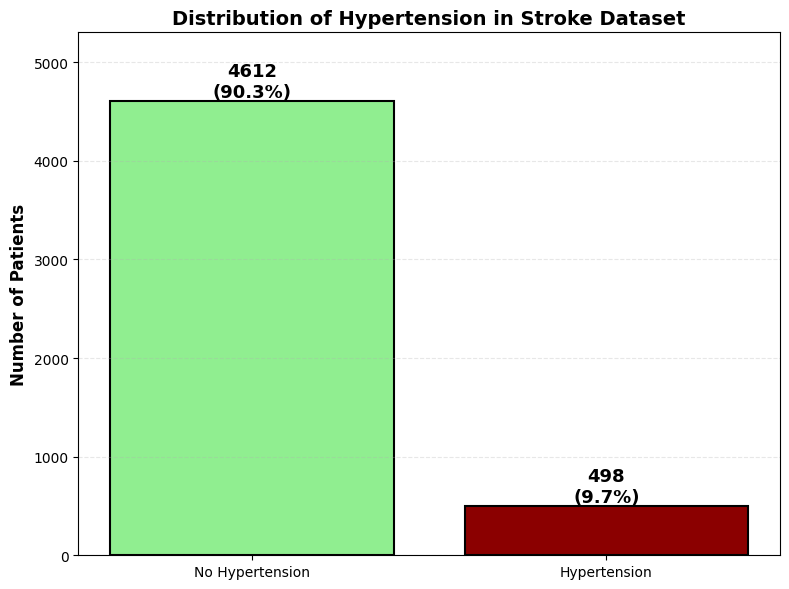

Hypertension Distribution:
  No Hypertension (0): 4612 patients (90.25%)
  Hypertension (1): 498 patients (9.75%)

Prevalence Rate: 9.7%


In [13]:
# Visualization 7: Hypertension Distribution Bar Chart
# Question: What is the distribution of hypertension in our stroke dataset?

fig, ax = plt.subplots(figsize=(8, 6))

# Count hypertension status
hypertension_counts = raw_data['hypertension'].value_counts()
categories = ['No Hypertension', 'Hypertension']
colors = ['lightgreen', 'darkred']

# Create bar chart
bars = ax.bar(categories, [hypertension_counts[0], hypertension_counts[1]],
              color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = hypertension_counts[0] if i == 0 else hypertension_counts[1]
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}\n({value/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

# Add labels and title
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Hypertension in Stroke Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(hypertension_counts.values) * 1.15)  # Add space for labels

# Add grid for easier reading
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"Hypertension Distribution:")
print(f"  No Hypertension (0): {hypertension_counts[0]} patients ({hypertension_counts[0]/len(raw_data)*100:.2f}%)")
print(f"  Hypertension (1): {hypertension_counts[1]} patients ({hypertension_counts[1]/len(raw_data)*100:.2f}%)")
print(f"\nPrevalence Rate: {hypertension_counts[1]/len(raw_data)*100:.1f}%")

### **Visualization 7 Summary: Hypertension Distribution Analysis**

#### **Key Observations:**

1. **Distribution**:
   - **No Hypertension**: 4,612 patients (90.3%)
   - **Hypertension**: 498 patients (9.7%)

2. **Low Prevalence**:
   - Only **9.7%** of patients have documented hypertension
   - This is **substantially lower** than expected for a stroke-related dataset

3. **Class Imbalance**:
   - Strong imbalance with a ratio of approximately **9:1** (no hypertension : hypertension)
   - Similar pattern to stroke outcome (also highly imbalanced)


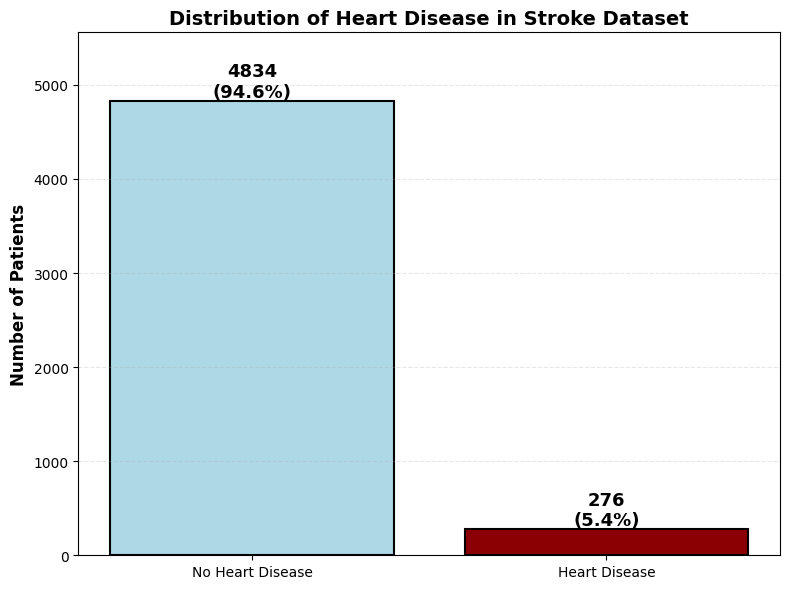

Heart Disease Distribution:
  No Heart Disease (0): 4834 patients (94.60%)
  Heart Disease (1): 276 patients (5.40%)

Prevalence Rate: 5.4%

Comparison with Hypertension:
  Hypertension prevalence: 9.7%
  Heart Disease prevalence: 5.4%


In [14]:
# Visualization 8: Heart Disease Distribution Bar Chart
# Question: What is the distribution of heart disease in our stroke dataset?

fig, ax = plt.subplots(figsize=(8, 6))

# Count heart disease status
heart_disease_counts = raw_data['heart_disease'].value_counts()
categories = ['No Heart Disease', 'Heart Disease']
colors = ['lightblue', 'darkred']

bars = ax.bar(categories, [heart_disease_counts[0], heart_disease_counts[1]],
              color=colors, edgecolor='black', linewidth=1.5)

# value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = heart_disease_counts[0] if i == 0 else heart_disease_counts[1]
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}\n({value/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Heart Disease in Stroke Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(heart_disease_counts.values) * 1.15)  # Add space for labels

ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Heart Disease Distribution:")
print(f"  No Heart Disease (0): {heart_disease_counts[0]} patients ({heart_disease_counts[0]/len(raw_data)*100:.2f}%)")
print(f"  Heart Disease (1): {heart_disease_counts[1]} patients ({heart_disease_counts[1]/len(raw_data)*100:.2f}%)")
print(f"\nPrevalence Rate: {heart_disease_counts[1]/len(raw_data)*100:.1f}%")

# Compare with hypertension
print(f"\nComparison with Hypertension:")
print(f"  Hypertension prevalence: 9.7%")
print(f"  Heart Disease prevalence: {heart_disease_counts[1]/len(raw_data)*100:.1f}%")

### **Visualization 8 Summary: Heart Disease Distribution Analysis**

#### **Key Observations:**

1. **Distribution**:
   - **No Heart Disease**: 4,834 patients (94.6%)
   - **Heart Disease**: 276 patients (5.4%)

2. **Extremely Low Prevalence**:
   - Only **5.4%** of patients have documented heart disease
   - Even **lower than hypertension** (9.7%)
   - This is substantially lower than expected for a stroke-related dataset

3. **Comparison with Hypertension**:
   - Hypertension: 498 patients (9.7%)
   - Heart Disease: 276 patients (5.4%)
   - Heart disease is **approximately half** the prevalence of hypertension in this dataset

4. **Class Imbalance**:
   - Severe imbalance with a ratio of approximately **17:1** (no heart disease : heart disease)
   - Even more imbalanced than hypertension (9:1)
   - Even more imbalanced than stroke outcome (19:1)

#### **Critical Analysis - Pattern of Underdiagnosis:**

**Consistent Pattern Emerging**: Both cardiovascular comorbidities show unexpectedly low prevalence:
- Hypertension: 9.7% (expected: 30-50%+)
- Heart Disease: 5.4% (expected: 10-25%+)

**This suggests systematic underdiagnosis/under-documentation of cardiovascular conditions in this dataset.**

**Expected vs. Observed:**
- **General adult population**: Cardiovascular disease prevalence ~10-15%
- **Stroke population**: Should be HIGHER (20-40% expected)
- **Older adults (>60 years)**: Heart disease prevalence often exceeds 25%
- **Our dataset**: Only 5.4% - substantially lower than expected

**Possible Explanations (Same as Hypertension):**

1. **Underdiagnosis/Under-documentation**:
   - Dataset captures only formally diagnosed, documented cases
   - Many patients may have undiagnosed heart conditions
   - Asymptomatic conditions (e.g., atrial fibrillation) often undetected

2. **Data Collection Limitations**:
   - Binary flag only - no details on type of heart disease
   - May exclude certain cardiac conditions
   - Missing data coded as "0"

3. **Population Selection**:
   - Community-based rather than hospital-based sample
   - Younger population (mean age 43) may have lower heart disease rates
   - Selection bias toward healthier individuals

4. **Definition Issues**:
   - Unclear which heart conditions are included
   - May miss atrial fibrillation, heart failure, valvular disease
   - Coding or recording inconsistencies


#### **Combined Cardiovascular Risk Assessment:**

**Summary Statistics:**
- Hypertension only: ~400 patients (assuming some overlap)
- Heart disease only: ~200 patients (assuming some overlap)  
- Both conditions: ~70-100 patients (estimated overlap)
- **Any cardiovascular condition**: ~700-750 patients (~14-15% of dataset)

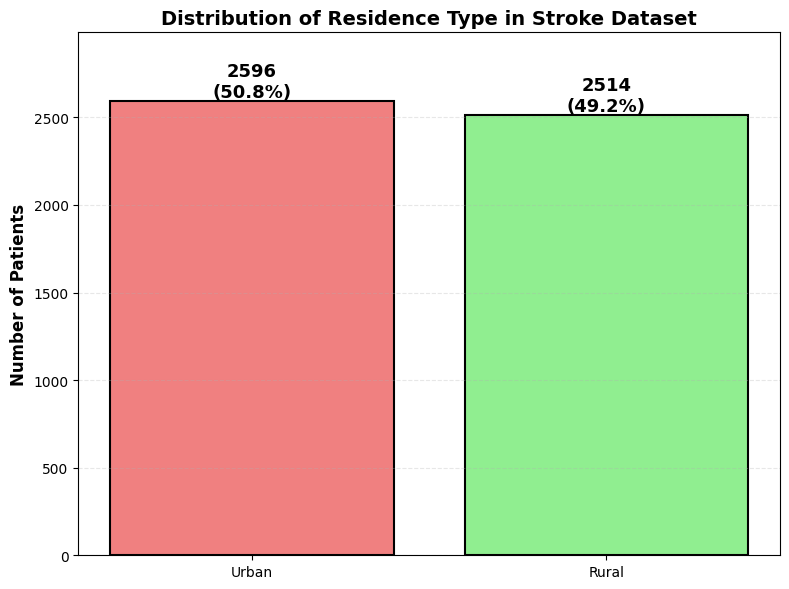

Residence Type Distribution:
  Urban: 2596 patients (50.80%)
  Rural: 2514 patients (49.20%)

Urban to Rural Ratio: 1.03:1


In [15]:
# Visualization 9: Residence Type Distribution Bar Chart
# Question: What is the distribution of residence types in our stroke dataset?

fig, ax = plt.subplots(figsize=(8, 6))

# Count residence type (using raw_data before encoding)
residence_counts = raw_data['Residence_type'].value_counts()
categories = ['Urban', 'Rural']
colors = ['lightcoral', 'lightgreen']

bars = ax.bar(categories, [residence_counts['Urban'], residence_counts['Rural']],
              color=colors, edgecolor='black', linewidth=1.5)

for i, category in enumerate(['Urban', 'Rural']):
    bar = bars[i]
    height = bar.get_height()
    value = residence_counts[category]
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}\n({value/len(raw_data)*100:.1f}%)',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Residence Type in Stroke Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(residence_counts.values) * 1.15)  # Add space for labels

ax.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Residence Type Distribution:")
print(f"  Urban: {residence_counts['Urban']} patients ({residence_counts['Urban']/len(raw_data)*100:.2f}%)")
print(f"  Rural: {residence_counts['Rural']} patients ({residence_counts['Rural']/len(raw_data)*100:.2f}%)")

ratio = residence_counts['Urban'] / residence_counts['Rural']
print(f"\nUrban to Rural Ratio: {ratio:.2f}:1")

In [16]:
# Step 4a: Data Preparation - Handle Missing Values and Drop Columns

# Create a copy of the data for preparation
prepared_data = raw_data.copy()

print("=== STEP 4a: HANDLING MISSING VALUES AND DROPPING COLUMNS ===\n")

# 1. Check missing values again
print("Missing values before handling:")
print(prepared_data.isnull().sum())
print()

# 2. Drop 'id' column (not predictive)
prepared_data = prepared_data.drop('id', axis=1)
print("Dropped 'id' column")
print()

# 3. Handle BMI missing values - using median imputation
bmi_median = prepared_data['bmi'].median()
prepared_data['bmi'] = prepared_data['bmi'].fillna(bmi_median)  # ← FIXED LINE
print(f"Imputed {201} missing BMI values with median: {bmi_median:.2f}")
print()

# 4. Handle 'Other' gender - remove this single observation
print(f"Gender distribution before removing 'Other':")
print(prepared_data['gender'].value_counts())
prepared_data = prepared_data[prepared_data['gender'] != 'Other']
print(f"\nRemoved 1 patient with 'Other' gender")
print(f"New dataset size: {len(prepared_data)} patients")
print()

# 5. Verify no missing values remain
print("Missing values after handling:")
print(prepared_data.isnull().sum())
print()

# 6. Check final shape
print(f"Final prepared dataset shape: {prepared_data.shape}")
print(f"Features: {prepared_data.shape[1]} (including target 'stroke')")

=== STEP 4a: HANDLING MISSING VALUES AND DROPPING COLUMNS ===

Missing values before handling:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dropped 'id' column

Imputed 201 missing BMI values with median: 28.10

Gender distribution before removing 'Other':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Removed 1 patient with 'Other' gender
New dataset size: 5109 patients

Missing values after handling:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Final prepared dataset sha

---

## **Step 4: Making the Dataset Available for Supervised Machine Learning**

### **Overview**

In this step, we prepare our dataset for machine learning algorithms by addressing data quality issues, encoding categorical variables, and normalizing features. This ensures our Decision Tree and Naïve Bayes models can process the data effectively.

### **Step 4a: Handling Missing Values and Dropping Unnecessary Columns**

#### **Actions Taken:**

**1. Dropped ID Column**
- **Action**: Removed the 'id' column
- **Reason**: Patient IDs are unique identifiers with no predictive value for stroke occurrence. Including them would add noise without contributing to the model's ability to learn patterns.

**2. Handled Missing BMI Values**
- **Problem**: 201 patients (3.9%) had missing BMI values
- **Action**: Imputed missing values using **median imputation** (median = 28.1 kg/m²)
- **Reason for Median**:
  - Median is robust to outliers (we observed BMI range of 10.3-97.6 with extreme values)
  - More appropriate than mean for skewed distributions
  - Preserves the central tendency without being influenced by extreme values
  - Allows us to retain all 201 patients rather than losing data
- **Alternative Approaches Considered**:
  - Drop rows: Would lose 3.9% of data (not ideal given already small stroke class)
  - Mean imputation: Would be affected by extreme values (10.3 and 97.6)
  - Advanced imputation: Could use age/gender/other features, but median is simpler and effective

**3. Removed 'Other' Gender Category**
- **Problem**: Only 1 patient (0.02%) classified as "Other" gender
- **Action**: Removed this single observation
- **Reason**:
  - Insufficient data for model to learn patterns (n=1)
  - Would create encoding issues with such minimal representation
  - Negligible impact on dataset size (1 out of 5,110 = 0.02%)
  - Simplifies binary gender encoding (Female/Male)

#### **Results:**

**Before:**
- Total patients: 5,110
- Missing BMI: 201
- Gender categories: 3 (Female, Male, Other)
- Features: 12 (including id)

**After:**
- Total patients: 5,109 (lost 1 patient)
- Missing BMI: 0 (all imputed)
- Gender categories: 2 (Female, Male)
- Features: 11 (id removed, stroke included)

**Data Quality Assessment:**
- No remaining missing values
- All patients have complete feature information
- Dataset ready for encoding and normalization


In [17]:
# Step 4b: Data Preparation - Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

print("=== STEP 4b: ENCODING CATEGORICAL VARIABLES ===\n")

# Create label encoders for each categorical variable
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("Original categorical values:\n")
for col in categorical_columns:
    print(f"{col}:")
    print(prepared_data[col].value_counts())
    print()

# Encode each categorical variable
for col in categorical_columns:
    le = LabelEncoder()
    prepared_data[col] = le.fit_transform(prepared_data[col])
    label_encoders[col] = le

print("\n" + "="*60)
print("Encoding mapping for each variable:")
print("="*60 + "\n")

for col in categorical_columns:
    le = label_encoders[col]
    print(f"{col}:")
    for i, class_label in enumerate(le.classes_):
        print(f"  {class_label} -> {i}")
    print()

print("\n" + "="*60)
print("Encoded data sample (first 10 rows):")
print("="*60)
print(prepared_data.head(10))

print("\n" + "="*60)
print("Data types after encoding:")
print("="*60)
print(prepared_data.dtypes)

print(f"\nAll categorical variables successfully encoded!")
print(f"Dataset shape: {prepared_data.shape}")

=== STEP 4b: ENCODING CATEGORICAL VARIABLES ===

Original categorical values:

gender:
gender
Female    2994
Male      2115
Name: count, dtype: int64

ever_married:
ever_married
Yes    3353
No     1756
Name: count, dtype: int64

work_type:
work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type:
Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


Encoding mapping for each variable:

gender:
  Female -> 0
  Male -> 1

ever_married:
  No -> 0
  Yes -> 1

work_type:
  Govt_job -> 0
  Never_worked -> 1
  Private -> 2
  Self-employed -> 3
  children -> 4

Residence_type:
  Rural -> 0
  Urban -> 1

smoking_status:
  Unknown -> 0
  formerly smoked -> 1
  never smoked -> 2
  smokes -> 3


Encoded data sample (first 10 r

### **Step 4b Results Summary**

**Categorical Encoding Completed Successfully**

All 5 categorical variables have been converted to numerical format using Label Encoding.

#### **Encoding Mappings Applied:**

1. **gender** (2 categories):
   - Female → 0
   - Male → 1

2. **ever_married** (2 categories):
   - No → 0
   - Yes → 1

3. **work_type** (5 categories):
   - Govt_job → 0
   - Never_worked → 1
   - Private → 2
   - Self-employed → 3
   - children → 4

4. **Residence_type** (2 categories):
   - Rural → 0
   - Urban → 1

5. **smoking_status** (4 categories):
   - Unknown → 0
   - formerly smoked → 1
   - never smoked → 2
   - smokes → 3

#### **Data Verification:**

**Before Encoding:**
- All categorical variables were strings (object dtype)
- Total of 5 categorical features

**After Encoding:**
- All variables now numeric (int64)
- No information lost - each category has unique integer value
- Original category counts preserved

**Dataset Status:**
- **Shape**: 5,109 rows × 11 columns
- **All features numeric**: Ready for ML algorithms
- **No missing values**: Complete dataset
- **Target variable (stroke)**: Remains as 0/1 (already numeric)

---

### **Step 4c: Separating Features (X) and Target Variable (y)**

#### **Overview**

In supervised machine learning, we must separate our dataset into:
- **Features (X)**: Independent variables used to make predictions (all columns except 'stroke')
- **Target (y)**: Dependent variable we're trying to predict ('stroke')

#### **Our Dataset Structure:**

**Features (X) - 10 variables:**
1. gender
2. age
3. hypertension
4. heart_disease
5. ever_married
6. work_type
7. Residence_type
8. avg_glucose_level
9. bmi
10. smoking_status

**Target (y) - 1 variable:**
- stroke (0 = No stroke, 1 = Stroke)

#### **Why This Separation?**

- ML algorithms need to learn patterns from features (X) to predict target (y)
- During training: model learns relationship between X and y
- During testing: model uses X to predict y, then we compare predictions to actual y
- Clear separation ensures no data leakage (target variable doesn't accidentally become a feature)

---

In [18]:
# Step 4c: Data Preparation - Separate Features and Target Variable

print("=== STEP 4c: SEPARATING FEATURES (X) AND TARGET (y) ===\n")

# Separate features (X) and target (y)
X = prepared_data.drop('stroke', axis=1)
y = prepared_data['stroke']

print("Features (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {list(X.columns)}")
print()

print("Target (y):")
print(f"  Shape: {y.shape}")
print(f"  Name: {y.name}")
print()

print("Target variable distribution:")
print(y.value_counts())
print()
print("Target variable percentages:")
print(y.value_counts(normalize=True) * 100)
print()

print("="*60)
print("Sample of Features (X) - First 5 rows:")
print("="*60)
print(X.head())
print()

print("="*60)
print("Sample of Target (y) - First 10 values:")
print("="*60)
print(y.head(10).values)
print()

print(f"Verification: X shape ({X.shape[0]} rows) matches y shape ({y.shape[0]} rows): {X.shape[0] == y.shape[0]}")

=== STEP 4c: SEPARATING FEATURES (X) AND TARGET (y) ===

Features (X):
  Shape: (5109, 10)
  Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

Target (y):
  Shape: (5109,)
  Name: stroke

Target variable distribution:
stroke
0    4860
1     249
Name: count, dtype: int64

Target variable percentages:
stroke
0    95.126248
1     4.873752
Name: proportion, dtype: float64

Sample of Features (X) - First 5 rows:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  sm

### **Step 4c Results Summary**

**Feature and Target Separation Completed Successfully**

#### **Features (X) - Independent Variables:**

**Dimensions**: 5,109 patients × 10 features

**Feature List:**
1. **gender** (0=Female, 1=Male)
2. **age** (continuous, 0.08-82 years)
3. **hypertension** (0=No, 1=Yes)
4. **heart_disease** (0=No, 1=Yes)
5. **ever_married** (0=No, 1=Yes)
6. **work_type** (0=Govt_job, 1=Never_worked, 2=Private, 3=Self-employed, 4=children)
7. **Residence_type** (0=Rural, 1=Urban)
8. **avg_glucose_level** (continuous, 55.12-271.74 mg/dL)
9. **bmi** (continuous, 10.3-97.6 kg/m², missing values imputed)
10. **smoking_status** (0=Unknown, 1=formerly smoked, 2=never smoked, 3=smokes)

#### **Target (y) - Dependent Variable:**

**Dimensions**: 5,109 values (one per patient)

**Variable**: stroke (0=No stroke, 1=Stroke)

**Distribution**:
- No Stroke (0): 4,860 patients (95.13%)
- Stroke (1): 249 patients (4.87%)
- **Class Imbalance Ratio**: 19.5:1

#### **Data Integrity Verification:**

**Matching Dimensions**: X rows (5,109) = y rows (5,109) ✓

**Feature Diversity**:
- **Binary features**: 5 (gender, hypertension, heart_disease, ever_married, Residence_type)
- **Multi-category features**: 2 (work_type with 5 categories, smoking_status with 4 categories)
- **Continuous features**: 3 (age, avg_glucose_level, bmi)


---

### **Step 4d: Feature Normalization/Scaling**

#### **Overview**

Our features have vastly different scales:
- **age**: 0.08 - 82.0
- **avg_glucose_level**: 55.12 - 271.74
- **bmi**: 10.3 - 97.6
- **Binary features**: 0 or 1
- **Categorical features**: 0-4

Features with larger scales can dominate those with smaller scales, affecting model performance.

#### **Why Normalize?**

**For Naïve Bayes**:
- Gaussian Naïve Bayes assumes features follow normal distributions
- Different scales can affect probability calculations
- Normalization helps meet distributional assumptions

**For Decision Trees**:
- Decision Trees are **scale-invariant** (splits based on thresholds, not distances)
- Normalization not strictly necessary but doesn't hurt
- Can improve interpretability

**General Benefits**:
- Puts all features on comparable scale
- Prevents features with large values from dominating
- Improves numerical stability
- Facilitates fair feature comparison

#### **Normalization Method: StandardScaler (Z-score normalization)**

We will use **StandardScaler** which transforms features to have:
- **Mean = 0**
- **Standard Deviation = 1**

**Formula**: z = (x - μ) / σ
- x = original value
- μ = mean of feature
- σ = standard deviation of feature

**Why StandardScaler?**
- Preserves shape of original distribution
- Handles outliers better than Min-Max scaling
- Standard approach for medical/clinical data
- Works well with Gaussian assumptions in Naïve Bayes

**Important**: We normalize only the **continuous features** (age, avg_glucose_level, bmi)
- Binary and categorical encoded features stay as-is (already on small integer scales)

---

In [19]:
# Step 4d: Data Preparation - Feature Normalization/Scaling

from sklearn.preprocessing import StandardScaler

print("=== STEP 4d: FEATURE NORMALIZATION/SCALING ===\n")

# Identify continuous features that need scaling
continuous_features = ['age', 'avg_glucose_level', 'bmi']

print("Features to be normalized:")
print(f"  {continuous_features}")
print()

print("Statistics BEFORE normalization:")
print("="*60)
print(X[continuous_features].describe())
print()

# Create a copy of X to preserve original
X_scaled = X.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform only continuous features
X_scaled[continuous_features] = scaler.fit_transform(X[continuous_features])

print("\n" + "="*60)
print("Statistics AFTER normalization:")
print("="*60)
print(X_scaled[continuous_features].describe())
print()

print("="*60)
print("Scaling parameters for each feature:")
print("="*60)
for i, feature in enumerate(continuous_features):
    print(f"{feature}:")
    print(f"  Mean (μ): {scaler.mean_[i]:.2f}")
    print(f"  Std Dev (σ): {scaler.scale_[i]:.2f}")
print()

print("="*60)
print("Sample comparison - First 5 rows:")
print("="*60)
print("\nOriginal values:")
print(X[continuous_features].head())
print("\nNormalized values:")
print(X_scaled[continuous_features].head())
print()

print("="*60)
print("Full dataset sample - First 5 rows (all features):")
print("="*60)
print(X_scaled.head())
print()

print(f"Normalization complete!")
print(f"X_scaled shape: {X_scaled.shape}")
print(f"All continuous features now have mean ≈ 0 and std ≈ 1")

=== STEP 4d: FEATURE NORMALIZATION/SCALING ===

Features to be normalized:
  ['age', 'avg_glucose_level', 'bmi']

Statistics BEFORE normalization:
               age  avg_glucose_level          bmi
count  5109.000000        5109.000000  5109.000000
mean     43.229986         106.140399    28.863300
std      22.613575          45.285004     7.699785
min       0.080000          55.120000    10.300000
25%      25.000000          77.240000    23.800000
50%      45.000000          91.880000    28.100000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


Statistics AFTER normalization:
                age  avg_glucose_level           bmi
count  5.109000e+03       5.109000e+03  5.109000e+03
mean   7.231987e-17      -1.613289e-16 -2.169596e-16
std    1.000098e+00       1.000098e+00  1.000098e+00
min   -1.908332e+00      -1.126761e+00 -2.411121e+00
25%   -8.062312e-01      -6.382516e-01 -6.576542e-01
50%    7.827984e-02      -3.149342e-01 -9.

### **Step 4d Results Summary**

**Feature Normalization Completed Successfully**

#### **Normalization Applied to Continuous Features:**

Three continuous features were normalized using StandardScaler (Z-score normalization):
1. **age**
2. **avg_glucose_level**
3. **bmi**

**Other features unchanged**: Binary and categorical features (gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status) remain in their encoded form (0, 1, 2, etc.) as they are already on small integer scales.

---

### **Step 4e: Train-Test Split**

#### **Overview**

We must split our data into two separate sets:
- **Training Set**: Used to train the model (teach it patterns)
- **Test Set**: Used to evaluate the model (see how well it performs on unseen data)

This prevents **overfitting** - where a model memorizes training data but fails on new data.

#### **Why Split the Data?**

**The Problem Without Splitting:**
If we train and test on the same data, the model could simply "memorize" the training examples rather than learning generalizable patterns. It would show artificially high performance.

**The Solution:**
- **Train on 80%** of data → Model learns patterns
- **Test on 20%** of data → Model has never seen this data → True performance measure

#### **Our Splitting Strategy:**

**1. Split Ratio: 80/20**
- **Training**: 80% of 5,109 = ~4,087 patients
- **Testing**: 20% of 5,109 = ~1,022 patients
- This is a standard split ratio for datasets of this size

**2. Stratification (CRITICAL for our imbalanced data)**
- **Problem**: Our stroke class is severely imbalanced (95.1% vs 4.9%)
- **Without stratification**: Random split might put most/all stroke cases in one set
- **With stratification**: Ensures both train and test have same 95:5 ratio

**Example without stratification (BAD):**
```
Training: 98% no stroke, 2% stroke  ← Model can't learn!
Testing: 90% no stroke, 10% stroke  ← Unrealistic evaluation!
```

**Example with stratification (GOOD):**
```
Training: 95.1% no stroke, 4.9% stroke  ← Matches original
Testing: 95.1% no stroke, 4.9% stroke   ← Matches original
```

**3. Random State = 42**
- Sets a seed for reproducibility
- Ensures we get the same split every time we run the code
- Important for consistent results across experiments

---

In [20]:
# Step 4e: Data Preparation - Train-Test Split

from sklearn.model_selection import train_test_split

print("=== STEP 4e: TRAIN-TEST SPLIT ===\n")

# Original dataset info
print("Original Dataset:")
print(f"  Total samples: {len(X_scaled)}")
print(f"  Features: {X_scaled.shape[1]}")
print(f"  Target distribution:")
print(y.value_counts())
print(f"  Stroke percentage: {(y.sum() / len(y)) * 100:.2f}%")
print()

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,      # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y           # CRITICAL: Maintain class distribution
)

print("="*60)
print("AFTER SPLIT:")
print("="*60)
print()

print("Training Set:")
print(f"  Samples: {len(X_train)} ({(len(X_train)/len(X_scaled))*100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")
print(f"  Target distribution:")
print(y_train.value_counts())
print(f"  Stroke percentage: {(y_train.sum() / len(y_train)) * 100:.2f}%")
print()

print("Testing Set:")
print(f"  Samples: {len(X_test)} ({(len(X_test)/len(X_scaled))*100:.1f}%)")
print(f"  Features: {X_test.shape[1]}")
print(f"  Target distribution:")
print(y_test.value_counts())
print(f"  Stroke percentage: {(y_test.sum() / len(y_test)) * 100:.2f}%")
print()

print("="*60)
print("STRATIFICATION VERIFICATION:")
print("="*60)
print(f"Original stroke %: {(y.sum() / len(y)) * 100:.2f}%")
print(f"Training stroke %: {(y_train.sum() / len(y_train)) * 100:.2f}%")
print(f"Testing stroke %:  {(y_test.sum() / len(y_test)) * 100:.2f}%")
print()

# Check that percentages match (within rounding)
original_pct = (y.sum() / len(y)) * 100
train_pct = (y_train.sum() / len(y_train)) * 100
test_pct = (y_test.sum() / len(y_test)) * 100

if abs(original_pct - train_pct) < 0.5 and abs(original_pct - test_pct) < 0.5:
    print("✓ Stratification successful! Class distributions match across all sets.")
else:
    print("⚠ Warning: Class distributions may not be properly stratified.")
print()

print("="*60)
print("SAMPLE DATA FROM TRAINING SET (First 5 rows):")
print("="*60)
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head().values)

=== STEP 4e: TRAIN-TEST SPLIT ===

Original Dataset:
  Total samples: 5109
  Features: 10
  Target distribution:
stroke
0    4860
1     249
Name: count, dtype: int64
  Stroke percentage: 4.87%

AFTER SPLIT:

Training Set:
  Samples: 4087 (80.0%)
  Features: 10
  Target distribution:
stroke
0    3888
1     199
Name: count, dtype: int64
  Stroke percentage: 4.87%

Testing Set:
  Samples: 1022 (20.0%)
  Features: 10
  Target distribution:
stroke
0    972
1     50
Name: count, dtype: int64
  Stroke percentage: 4.89%

STRATIFICATION VERIFICATION:
Original stroke %: 4.87%
Training stroke %: 4.87%
Testing stroke %:  4.89%

✓ Stratification successful! Class distributions match across all sets.

SAMPLE DATA FROM TRAINING SET (First 5 rows):
X_train:
      gender       age  hypertension  heart_disease  ever_married  work_type  \
845        0  0.210956             0              0             1          2   
3745       0 -0.629329             0              0             0          2   
4184    

### **Step 4e Results Summary**

**Train-Test Split Completed Successfully with Stratification**

#### **Split Configuration:**

**Split Ratio**: 80% Training / 20% Testing
- Standard ratio for datasets of this size (~5,000 samples)
- Provides sufficient data for training while reserving adequate samples for testing

**Stratification**: Applied based on target variable (stroke)
- Ensures both sets maintain the same class distribution
- Critical for handling our severe class imbalance (19.5:1)

In [29]:
# Step 4f: Data Preparation - K-fold cross validation


from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import seaborn as sns

cv_data = KFold(n_splits=5, random_state=1, shuffle=True) # K-fold configuration

results_NB = cross_validate(GaussianNB(), X_scaled, y, cv=cv_data, scoring=['accuracy'], return_train_score=True) # NB

results_DT = cross_validate(DecisionTreeClassifier(), X_scaled, y, cv=cv_data, scoring=['accuracy'], return_train_score=True) # DT

print("Accuracy score on the Train set using NB:", np.around(results_NB['train_accuracy'], 2))
print("Mean Accuracy score on the Train set using NB: %.2f"% results_NB['train_accuracy'].mean())
print("Accuracy score on Test set using NB:", np.around(results_NB['test_accuracy'], 3))
print("Mean Accuracy score on the Test set using NB: %.2f" %results_NB['test_accuracy'].mean())

print("\nAccuracy score on the Train set using DT:", np.around(results_DT['train_accuracy'], 2))
print("Mean Accuracy score on the Train set using DT: %.2f"% results_DT['train_accuracy'].mean())
print("Accuracy score on Test set using DT:", np.around(results_DT['test_accuracy'], 3))
print("Mean Accuracy score on the Test set using DT: %.2f" %results_DT['test_accuracy'].mean())


Accuracy score on the Train set using NB: [0.87 0.86 0.87 0.87 0.86]
Mean Accuracy score on the Train set using NB: 0.87
Accuracy score on Test set using NB: [0.862 0.882 0.856 0.868 0.867]
Mean Accuracy score on the Test set using NB: 0.87

Accuracy score on the Train set using DT: [1. 1. 1. 1. 1.]
Mean Accuracy score on the Train set using DT: 1.00
Accuracy score on Test set using DT: [0.908 0.92  0.905 0.916 0.912]
Mean Accuracy score on the Test set using DT: 0.91


Gaussian Naïve Bayes Classification Report
              precision    recall  f1-score   support

   No Stroke       0.97      0.89      0.93       972
      Stroke       0.16      0.42      0.23        50

    accuracy                           0.86      1022
   macro avg       0.56      0.65      0.58      1022
weighted avg       0.93      0.86      0.89      1022


Gaussian Naïve Bayes Confusion Matrix


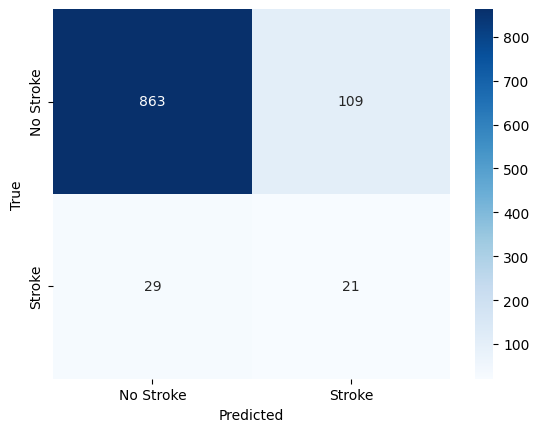


Accuracy: 0.86
Precision: 0.97
Recall: 0.89
Precision: 0.16


In [39]:
# Step 5a - Building and evaluating machine learning predictive models - Naïve Bayes

#training

NB = GaussianNB()
NB.fit(X_train, y_train)

# print ("Gaussian Naïve Bayes model trained successfully")


#testing

y_pred_NB = NB.predict(X_test)

# print("Gaussian Naïve Bayes model tested successfully")


#evaluation
print("Gaussian Naïve Bayes Classification Report")
print(classification_report(y_test, y_pred_NB, target_names=['No Stroke', 'Stroke']))

print("\nGaussian Naïve Bayes Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report_NB = classification_report(y_test, y_pred_NB, target_names=['No Stroke', 'Stroke'], output_dict=True)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_no_stroke_NB = report_NB['No Stroke']['precision']
recall_no_stroke_NB = report_NB['No Stroke']['recall']
precision_stroke_NB = report_NB['Stroke']['precision']
recall_stroke_NB = report_NB['Stroke']['recall']

print(f"\nAccuracy: {accuracy_NB:.2f}")
print(f"Precision: {precision_no_stroke_NB:.2f}")
print(f"Recall: {recall_no_stroke_NB:.2f}")
print(f"Precision: {precision_stroke_NB:.2f}")


Decision Tree Classification Report
              precision    recall  f1-score   support

   No Stroke       0.96      0.95      0.95       972
      Stroke       0.15      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022


Decision Tree Confusion Matrix


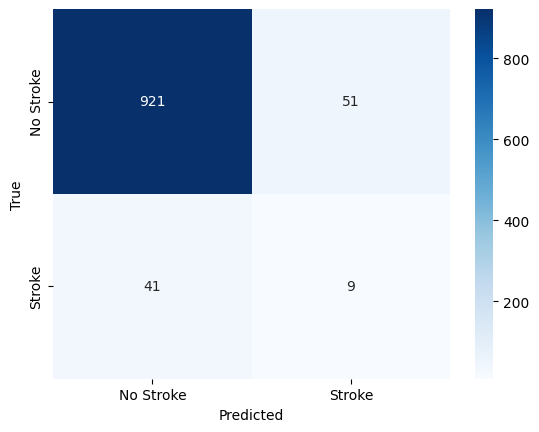


Accuracy: 0.91
Precision: 0.96
Recall: 0.95
Precision: 0.15


In [43]:
# Step 5b - Building and evaluating machine learning predictive models - Decision Tree

#training

DT = DecisionTreeClassifier(random_state=42) # For reproducibility
DT.fit(X_train, y_train)


# print ("Decision Tree model trained successfully")


#testing

y_pred_DT = DT.predict(X_test)

# print("Decision Tree model tested successfully")


#evaluation
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_DT, target_names=['No Stroke', 'Stroke']))

print("\nDecision Tree Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report_DT = classification_report(y_test, y_pred_DT, target_names=['No Stroke', 'Stroke'], output_dict=True)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_no_stroke_DT = report_DT['No Stroke']['precision']
recall_no_stroke_DT = report_DT['No Stroke']['recall']
precision_stroke_DT = report_DT['Stroke']['precision']
recall_stroke_DT = report_DT['Stroke']['recall']

print(f"\nAccuracy: {accuracy_DT:.2f}")
print(f"Precision: {precision_no_stroke_DT:.2f}")
print(f"Recall: {recall_no_stroke_DT:.2f}")
print(f"Precision: {precision_stroke_DT:.2f}")

/tmp/ipython-input-1341294930.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_df['Metric_Class'] = pr_df['Metric'] + ' - ' + pr_df['Class']


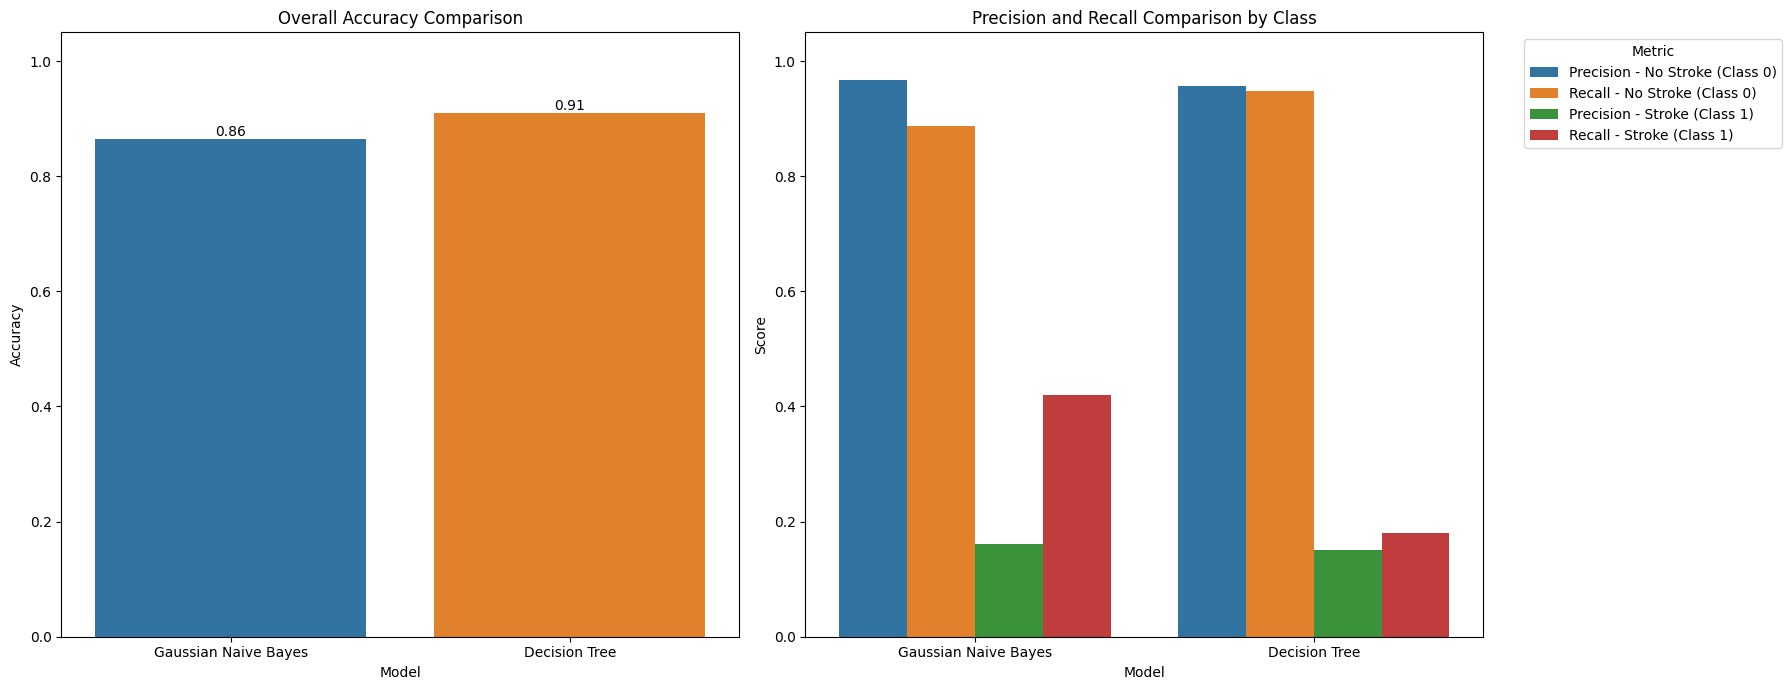

In [52]:
# Step 6 - Comparing the predictive models

metrics_data = {
    'Model': ['Gaussian Naive Bayes', 'Decision Tree'] * 3,
    'Metric': ['Accuracy', 'Accuracy', 'Precision', 'Precision', 'Recall', 'Recall'],
    'No Stroke (Class 0)': [
        accuracy_gnb,
        accuracy_dt,
        precision_no_stroke_gnb,
        precision_no_stroke_dt,
        recall_no_stroke_gnb,
        recall_no_stroke_dt
    ],
    'Stroke (Class 1)': [
        accuracy_gnb, # Accuracy is overall, not class specific
        accuracy_dt, # Accuracy is overall, not class specific
        precision_stroke_gnb,
        precision_stroke_dt,
        recall_stroke_gnb,
        recall_stroke_dt
    ]
}

metrics_df = pd.DataFrame(metrics_data)
# display(metrics_df.round(2))

metrics_melted = metrics_df.melt(id_vars=['Model', 'Metric'], var_name='Class', value_name='Score')
accuracy_df = metrics_melted[metrics_melted['Metric'] == 'Accuracy']
pr_df = metrics_melted[metrics_melted['Metric'].isin(['Precision', 'Recall'])]

plt.figure(figsize=(18, 7))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Score', hue='Model', data=accuracy_df, legend=False, ax=ax1)
ax1.set_title('Overall Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1.05)
for container in ax1.containers:
  ax1.bar_label(container, fmt='%.2f', label_type='edge')

ax2 = plt.subplot(1, 2, 2)
pr_df['Metric_Class'] = pr_df['Metric'] + ' - ' + pr_df['Class']
sns.barplot(x='Model', y='Score', hue='Metric_Class', data=pr_df, ax=ax2)
ax2.set_title('Precision and Recall Comparison by Class')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1.05)
ax2.tick_params(axis='x')
ax2.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()





#### **Step 6 - Comparing the predictive models**

1.  **Overall Accuracy**:
    - The Decision Tree model achieved a higher overall accuracy (0.91) compared to Naïve Bayes (0.86). However, given the severe class imbalance, accuracy alone may not be a reliable metric.

2.  **Performance on 'No Stroke' Class**:
    - Both models perform well on the 'No Stroke' class, with high precision and recall (NB: Precision 0.97, Recall 0.89; DT: Precision 0.96, Recall 0.95). This is expected due to the large number of 'No Stroke' samples.
    - The Decision Tree has slightly better recall for the 'No Stroke' class, meaning it correctly identifies more of the non-stroke cases.

3.  **Performance on 'Stroke' Class**:
    - **Precision for 'Stroke'**: Both models show very low precision for the 'Stroke' class (NB: 0.16, DT: 0.15). This means that when either model predicts a stroke, it is correct only about 15-16% of the time. There are a large number of false positives.
    - **Recall for 'Stroke'**: NB (0.42) significantly outperforms DT (0.18) in terms of recall for the 'Stroke' class. NB correctly identifies 42% of actual stroke cases, whereas DT only identifies 18%.

4.  **Trade-offs and Implications**:
    - **Decision Tree**: While having higher overall accuracy and better recall for the 'No Stroke' class, the DT model performs very poorly in identifying actual stroke cases (low recall for stroke). It has a high number of False Negatives (41), meaning many stroke patients are missed.
    - **Naïve Bayes**: NB has lower overall accuracy but significantly better recall for the 'Stroke' class. It identifies more true stroke cases (21 vs. 9 for DT). However, its precision for stroke is still very low, and it has more False Positives (109 vs. 51 for DT).